# Datasets statistics

In [1]:
%cd '../HOTS'
import tonic
import numpy as np
import matplotlib.pyplot as plt
from Network import LoadFromMat
import pickle

/home/antoine/homhots/HOTS/HOTS


# For DVS\_barrel

In [2]:
path = "../Data/alphabet_ExtractedStabilized.mat"
image_list=list(np.arange(0, 76))
address, time, polarity, list_pola = LoadFromMat(path, image_number=image_list)
with open('../Data/alphabet_label.pkl', 'rb') as file:
    label_list = pickle.load(file)

In [3]:
nbev = []
recordingtime = []
for i, l in enumerate(label_list):
    nbev.append(l[1])
    recordingtime.append(time[l[1]]*1e6)

mean value for the recording time: 60.858 ms
mean value for the number of events: 14197


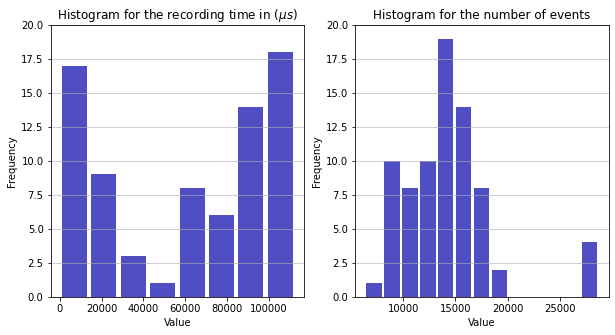

In [4]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
for i in range(2):
    if i == 0:
        x = recordingtime
        ttl = 'recording time in ($\mu s$)'
    else:
        x = nbev
        ttl = 'number of events'
    #hist, bin_edges = np.histogram(x)
    n, bins, patches = axs[i].hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for the {ttl}')
    #axs[i].text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    axs[i].set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
print(f'mean value for the recording time: {np.round(np.mean(recordingtime),0)/1e3} ms')
print(f'mean value for the number of events: {int(np.round(np.mean(nbev),0))}')

## For Poker-DVS

In [5]:
trainset = tonic.datasets.POKERDVS(save_to='../Data',
                                download=False, train = True
                              )
testset = tonic.datasets.POKERDVS(save_to='../Data',
                                download=False, train = False
                              )

print(f'number of samples in the trainset: {len(trainset)}')
print(f'number of samples in the testset: {len(testset)}')

x_index = trainset.ordering.find("x")
y_index = trainset.ordering.find("y")
t_index = trainset.ordering.find("t")
p_index = trainset.ordering.find("p")

number of samples in the trainset: 48
number of samples in the testset: 20


In [12]:
train_class = np.zeros(len(trainset.classes))
test_class = np.zeros(len(trainset.classes))
nbev = []
recordingtime = []
for events, target in trainset:
    train_class[target]+=1
    nbev.append(len(events))
    recordingtime.append(events[-1,t_index]-events[0,t_index])
for events, target in testset:
    test_class[target]+=1
    nbev.append(len(events))
    recordingtime.append(events[-1,t_index]-events[0,t_index])

mean value for the recording time: 17.4 ms
mean value for the number of events: 3050


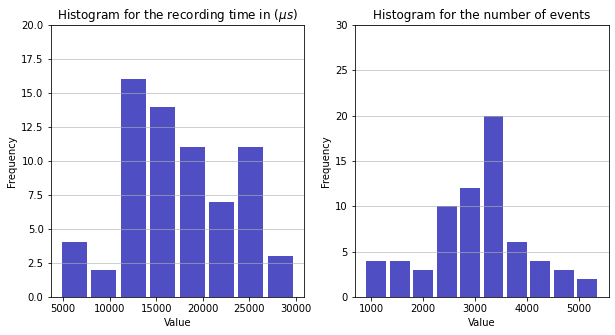

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
for i in range(2):
    if i == 0:
        x = recordingtime
        ttl = 'recording time in ($\mu s$)'
    else:
        x = nbev
        ttl = 'number of events'
    #hist, bin_edges = np.histogram(x)
    n, bins, patches = axs[i].hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for the {ttl}')
    #axs[i].text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    axs[i].set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
print(f'mean value for the recording time: {np.round(np.mean(recordingtime),0)/1e3} ms')
print(f'mean value for the number of events: {int(np.round(np.mean(nbev),0))}')

# For N-MNIST

In [2]:
trainset = tonic.datasets.NMNIST(save_to='../Data',
                                download=False, train = True
                              )
testset = tonic.datasets.NMNIST(save_to='../Data',
                                download=False, train = False
                              )

print(f'number of samples in the trainset: {len(trainset)}')
print(f'number of samples in the testset: {len(testset)}')

x_index = trainset.ordering.find("x")
y_index = trainset.ordering.find("y")
t_index = trainset.ordering.find("t")
p_index = trainset.ordering.find("p")

train_class = np.zeros(len(trainset.classes))
test_class = np.zeros(len(trainset.classes))
nbev = []
recordingtime = []
for events, target in trainset:
    train_class[target]+=1
    nbev.append(len(events))
    recordingtime.append(events[-1,t_index]-events[0,t_index])
for events, target in testset:
    test_class[target]+=1
    nbev.append(len(events))
    recordingtime.append(events[-1,t_index]-events[0,t_index])

number of samples in the trainset: 60000
number of samples in the testset: 10000


mean value for the recording time: 306.457 ms
mean value for the number of events: 4176


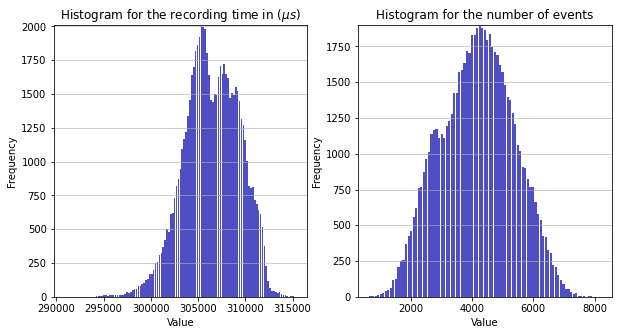

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
for i in range(2):
    if i == 0:
        x = recordingtime
        ttl = 'recording time in ($\mu s$)'
    else:
        x = nbev
        ttl = 'number of events'
    #hist, bin_edges = np.histogram(x)
    n, bins, patches = axs[i].hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for the {ttl}')
    #axs[i].text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    axs[i].set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
print(f'mean value for the recording time: {np.round(np.mean(recordingtime),0)/1e3} ms')
print(f'mean value for the number of events: {int(np.round(np.mean(nbev),0))}')

In [15]:
print(np.percentile(nbev, 95))

6129.0


# For N-CARS

In [10]:
trainset = tonic.datasets.NCARS(save_to='../Data',
                                download=False, train = True
                              )
testset = tonic.datasets.NCARS(save_to='../Data',
                                download=False, train = False
                              )

print(f'number of samples in the trainset: {len(trainset)}')
print(f'number of samples in the testset: {len(testset)}')

x_index = trainset.ordering.find("x")
y_index = trainset.ordering.find("y")
t_index = trainset.ordering.find("t")
p_index = trainset.ordering.find("p")

train_class = np.zeros(len(trainset.classes))
test_class = np.zeros(len(trainset.classes))
nbev = []
recordingtime = []
for events, target in trainset:
    train_class[target]+=1
    nbev.append(len(events))
    recordingtime.append(events[:,t_index][-1])
for events, target in testset:
    test_class[target]+=1
    nbev.append(len(events))
    recordingtime.append(events[:,t_index][-1])

number of samples in the trainset: 15422
number of samples in the testset: 8607


mean value for the recording time: 99.824 ms
mean value for the number of events: 3966


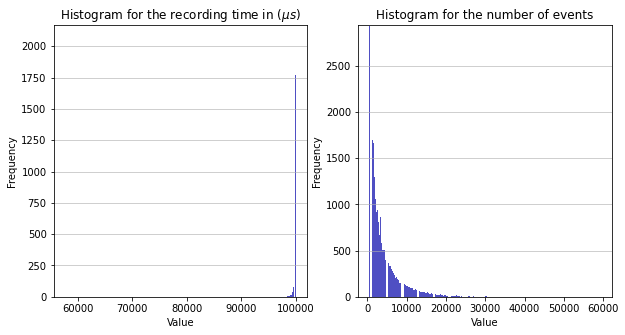

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
for i in range(2):
    if i == 0:
        x = recordingtime
        ttl = 'recording time in ($\mu s$)'
    else:
        x = nbev
        ttl = 'number of events'
    #hist, bin_edges = np.histogram(x)
    n, bins, patches = axs[i].hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for the {ttl}')
    #axs[i].text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    axs[i].set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
print(f'mean value for the recording time: {np.round(np.mean(recordingtime),0)/1e3} ms')
print(f'mean value for the number of events: {int(np.round(np.mean(nbev),0))}')

In [12]:
x_grid = []
y_grid = []
for events, target in trainset:
    size_x = max(events[:,trainset.ordering.find("x")])-min(events[:,trainset.ordering.find("x")])
    size_y = max(events[:,trainset.ordering.find("y")])-min(events[:,trainset.ordering.find("y")])
    y_grid.append(size_y)
    x_grid.append(size_x)
for events, target in testset:
    size_x = max(events[:,trainset.ordering.find("x")])-min(events[:,trainset.ordering.find("x")])
    size_y = max(events[:,trainset.ordering.find("y")])-min(events[:,trainset.ordering.find("y")])
    y_grid.append(size_y)
    x_grid.append(size_x)

mean value for the recording time: 99.824 ms
mean value for the number of events: 3966


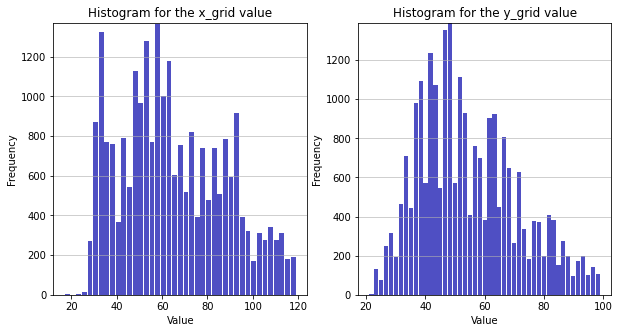

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
for i in range(2):
    if i == 0:
        x = x_grid
        ttl = 'x_grid value'
    else:
        x = y_grid
        ttl = 'y_grid value'
    #hist, bin_edges = np.histogram(x)
    n, bins, patches = axs[i].hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for the {ttl}')
    #axs[i].text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    axs[i].set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
print(f'mean value for the recording time: {np.round(np.mean(recordingtime),0)/1e3} ms')
print(f'mean value for the number of events: {int(np.round(np.mean(nbev),0))}')

In [14]:
print(np.min(x_grid), np.min(y_grid)) 
print(np.max(x_grid), np.max(y_grid)) 

17.0 21.0
119.0 99.0
